<div align="center">
  <img src="uvg.jpg"  height="200" width="200">
</div>


<textarea id="w3mission" rows="4" cols="50" style="border: none" >
    Juan Luis Sanchez Garcia
    Data Analytics
</textarea>





<div style="text-align: center"> <h1> Proyecto 2 - Modelos de regresión </h1> </div>

El dataset a utlizar es [Nobel Laureates](https://www.kaggle.com/deepakdeepu8978/nobel-laureates-1901present)





## Parte 1: Pregunta de investigación 

Hay alguna implicación entre la longevidad de una persona y los anios que le toma obtener un premio Nobel?

## Parte 2: Análisis de daatos exploratorio

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm


Cargamos la data para el análisis

In [134]:
da = pd.read_csv("nobel_prize_by_winner.csv",encoding = "ISO-8859-1")


## Contexto

The Nobel Prize is a set of annual international awards bestowed in several categories by Swedish and Norwegian institutions in recognition of academic, cultural, or scientific advances. The will of the Swedish chemist, engineer and industrialist Alfred Nobel established the five Nobel prizes in 1895.

A person or organization awarded the Nobel Prize is called Nobel Laureate. The word "laureate" refers to being signified by the laurel wreath. In ancient Greece, laurel wreaths were awarded to victors as a sign of honor.

In [33]:
da.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,Nairobi,female,2004.0,peace,NaN,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,Shipston-on-Stour,female,1964.0,chemistry,NaN,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom
4,918,Youyou,Tu,12/30/1930,0000-00-00,China,CN,Zhejiang Ningbo,NaN,NaN,NaN,female,2015.0,medicine,NaN,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China


Utilizaremos las siguientes columnas

| firstname | surname  | born  |  died  |  bornCountry | bornCountryCode | bornCity  | diedCountry  |  diedCountryCode  |  diedCity | gender | year | category | city | country |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|


In [135]:
da = da[["firstname","surname","born",
                   "died","bornCountry","bornCountryCode",
                   "bornCity","diedCountry","diedCountryCode","diedCity","gender","year","category",
                   "city","country"]]


Eliminamos los nulos para analizar los premios nobel otorgados a personas y no a instituciones

In [136]:
da = da.dropna()
da.head()

,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,city,country
0,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,"Bloomington, IN",USA
1,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,"Tempe, AZ",USA
3,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,Shipston-on-Stour,female,1964.0,chemistry,Oxford,United Kingdom
5,Barbara,McClintock,6/16/1902,9/2/1992,USA,US,"Hartford, CT",USA,US,"Huntington, NY",female,1983.0,medicine,"Cold Spring Harbor, NY",USA
16,Rosalyn,Yalow,7/19/1921,5/30/2011,USA,US,"New York, NY",USA,US,"New York, NY",female,1977.0,medicine,"Bronx, NY",USA


Con la funcion `to_datetime` de pandas convertimos `da['born']`  y  `da['died']` al formato de fecha para posteriormente obtener `year` con la funcion `dt`

 | birthYear | diedYear| 
 |---|---|
 | Extraido de born  |  Extraido de died | 

In [137]:
da['birthYear'] =  pd.to_datetime(da['born']).dt.year
da['diedYear'] =  pd.to_datetime(da['died'],errors='coerce').dt.year



 | yearsToPrize | longevidad | 
 |---|---|
 | year - birthYear  |  diedYear - birthYear | 

In [138]:
da["yearsToPrize"]=da["year"]-da["birthYear"]
da["longevidad"]=da["diedYear"]-da["birthYear"]

Limpiaremos la data ya que tenemos fechas de defuncion posteriores al `2020` 

In [139]:
da.drop(da[ da['diedYear'] > 2020 ].index , inplace=True)

Describimos el parámetro de años que le toma a una persona alcanzar un premio nobel con una media de 57.3 y una mediana de 56, la persona que alcanzo un premio nobel mas joven fue a los 25 anios y la que alcanzo el premio nobel mas entredo en anios fue de 90 anios, este análisis excluye a las personas a las que se le otorgo un premio nobel post mortem

In [140]:
da.yearsToPrize.dropna().describe().round(1)

count    422.0
mean      57.3
std       12.6
min       25.0
25%       48.0
50%       56.0
75%       66.0
max       90.0
Name: yearsToPrize, dtype: float64

<div style="text-align: center"> <h4> Cantidad de años para alcanzar un premio nobel </h4> </div>

La distribución de los años que le toma a una persona alcanzar un premio nobel es aproximadamente en forma de campana con un centro de 56 anios, con un rango de 65 anios (25-90), sin valores atípicos aparentes.


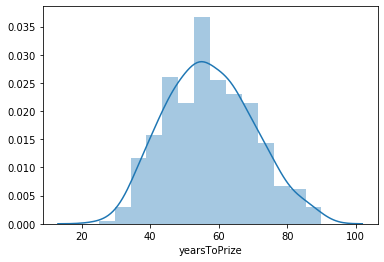

In [141]:
sns.distplot(da.yearsToPrize.dropna())

Describimos la longevidad de las personas que alcanzaron un premio nobel teniendo como media 84.1 y como mediana 83 anios, teniendo un maximo de 182 anios el que vivio mas y 47 el que vivio menos  

In [142]:
da.longevidad.dropna().describe().round(1)

count    421.0
mean      84.1
std       18.3
min       47.0
25%       75.0
50%       83.0
75%       89.0
max      182.0
Name: longevidad, dtype: float64

<div style="text-align: center"> <h4> Longevidad </h4> </div>

La distribución de longevidad tiene una forma sesgada por los valores atípicos, con un centro en 83, y un rango de (47-182)

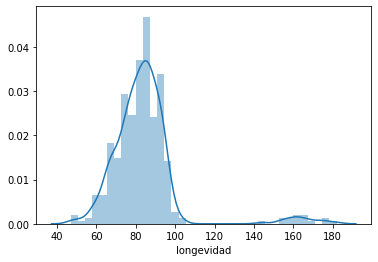

In [143]:
sns.distplot(da.longevidad.dropna())

En el boxplot categoria y anios para alcanzar un premio nobel vemos que el valor central para la mayoria de categorias esta entre 50 y 60 a excepción de `economics` y `peace`

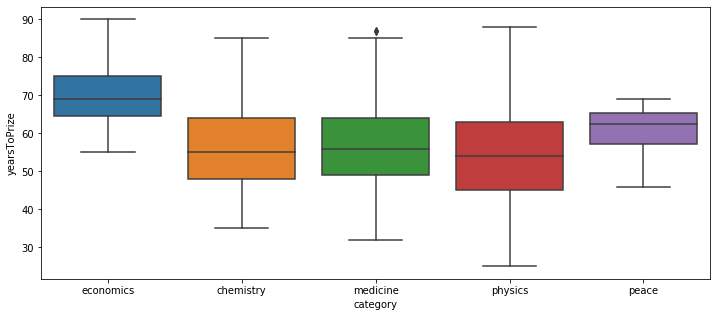

In [144]:
plt.figure(figsize=(12, 5))  
sns.boxplot(x="category", y="yearsToPrize" , data=da) 

También podemos ver que al agregarle la variable género se siguen presentando los valores centrales entre 50 y 60 para los hombres y no así para las mujeres.

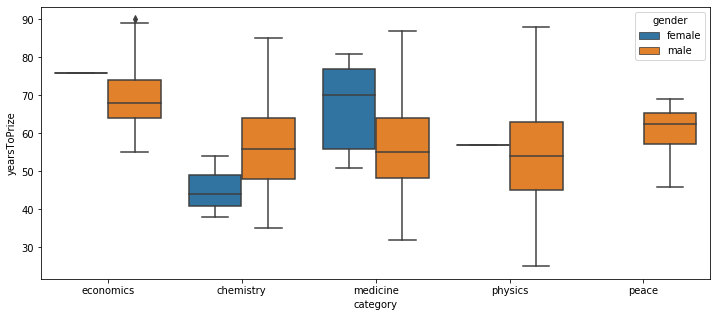

In [145]:
plt.figure(figsize=(12, 5))  
sns.boxplot(x="category", y="yearsToPrize" , hue="gender", data=da)  

QQ-plot para ver si la data sigue una distribución normal y como podemos observar se apega bastante a una distribución normal como también lo apreciamos en la gráfica del histograma

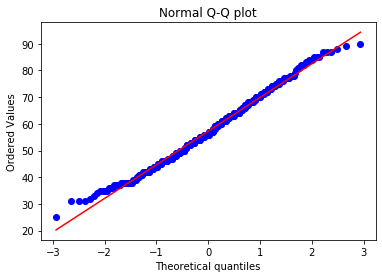

In [146]:
stats.probplot(da.yearsToPrize.dropna(), dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Correlación entre la Longevidad y cantidad años que le tomo obtener el premio novel desde su nacimiento, eliminando los valores de longevidad mayores a 100, ya que asumiremos que son datos erroneos debido a que el promedio de vida históricamente en los últimos 200 anios no es tan grande.

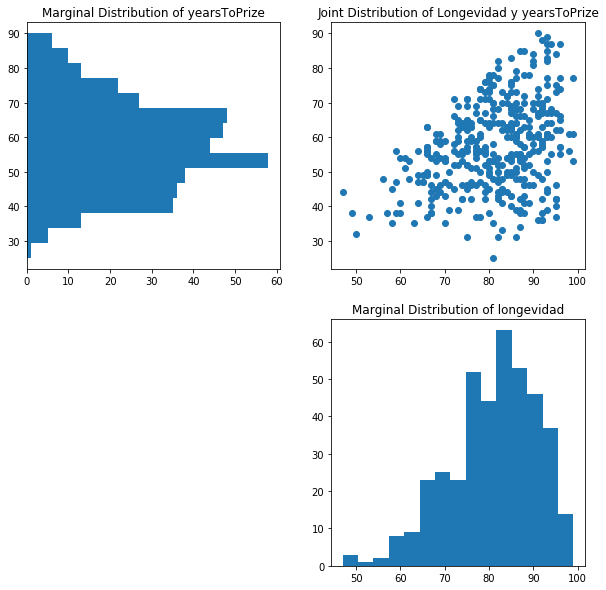

In [147]:
da = da[da['longevidad']< 100]
# Plot the data
plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
plt.scatter(x = da['longevidad'], y = da['yearsToPrize'])
plt.title("Joint Distribution of Longevidad y yearsToPrize")

# Plot the Marginal X Distribution
plt.subplot(2,2,4)
plt.hist(x = da['longevidad'], bins = 15)
plt.title("Marginal Distribution of longevidad")


# Plot the Marginal Y Distribution
plt.subplot(2,2,1)
plt.hist(x = da['yearsToPrize'], orientation = "horizontal", bins = 15)
plt.title("Marginal Distribution of yearsToPrize")

# Show the plots
plt.show()


Tenemos un coeficiente de correlación de 0.35 entre la longevidad y los anios para alcanzar un premio nobel, por lo que podemos decir que la correlación entre ambas variables es positiva débil.

In [158]:
da[['longevidad','yearsToPrize']].corr()


,longevidad,yearsToPrize
longevidad,1.000000,0.345389
yearsToPrize,0.345389,1.000000


## Parte 3: Análisis de daatos exploratorio

## Variables para el Modelado:

1. Variable dependiente
    1. `Longevidad`
2. Variables independientes
    1. `yearsToPrize` (Anios que le toman conseguir un premio Nobel)
    
    
`Razonamiento exclusión de variables`

Nuestra pregunta de investigación esta enfocada en saber si existe alguna implicación entre la longevidad de una persona y los anios que le toman obtener un premio Nobel, por lo cual las otras variables no se tomaran en cuenta.


`Razonamiento inclusión de variables`

Igualmente que en la exclusión de variables nuestra pregunta de investigación se enfoca en la longevidad y yearsToPrize por lo que son las únicas dos variables necesarias para el modelo.


## Gráficas:


In [150]:
model = sm.OLS.from_formula("longevidad ~ yearsToPrize", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             longevidad   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     54.32
Date:                Sun, 17 May 2020   Prob (F-statistic):           9.84e-13
Time:                        19:28:07   Log-Likelihood:                -1470.9
No. Observations:                 403   AIC:                             2946.
Df Residuals:                     401   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       65.4906      2.158     30.351      0.000      61.249      69.733
yearsToPrize     0.2710      0.037      7.370      0.000       0.199       0.343
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.139
Skew:                          -0.276   Prob(JB):                       0.0282
Kurtosis:                       2.652   Cond. No.                         272.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En esta grafica se demuestra la relacion entre la longegevidad y yearsToPrize para mujeres

/Users/jlsanchez/opt/anaconda3/envs/uvg/lib/python3.8/site-packages/statsmodels/sandbox/predict_functional.py:169: ValueWarning: 'bornCity', 'bornCountryCode', 'diedCountry', 'city', 'born', 'surname', 'year', 'category', 'firstname', 'diedCity', 'birthYear', 'diedCountryCode', 'country', 'bornCountry', 'diedYear', 'died' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."


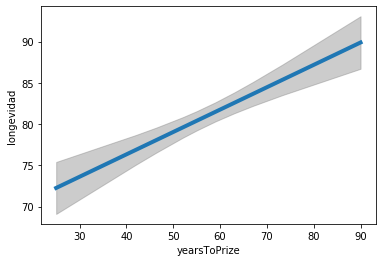

In [159]:
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.  Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = {"gender": "famale"}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result, "yearsToPrize",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("yearsToPrize")
_ = ax.set_ylabel("longevidad")

## Interpretación de coeficientes:


In [160]:
model = sm.OLS.from_formula("longevidad ~ yearsToPrize ", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             longevidad   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     54.32
Date:                Sun, 17 May 2020   Prob (F-statistic):           9.84e-13
Time:                        19:41:38   Log-Likelihood:                -1470.9
No. Observations:                 403   AIC:                             2946.
Df Residuals:                     401   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       65.4906      2.158     30.351      0.000      61.249      69.733
yearsToPrize     0.2710      0.037      7.370      0.000       0.199       0.343
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.139
Skew:                          -0.276   Prob(JB):                       0.0282
Kurtosis:                       2.652   Cond. No.                         272.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. Según el parámetro `R-squared` podemos deducir que solamente el 12% de la variabilidad de la longevidad puede ser explicada por los anios para alcanzar un premio (`yearsToPrize`)

2.  Con 95% de confianza, el cambio promedio poblacional en la longevidad para un incremento de una anio en yearsToPrize está estimado entre 0.2 anios y 0.35 anios más.


<div style="text-align: center"> <h4> Línea de mejor ajuste </h4> </div>



$$ \hat{y} = b_{o} + b_{1}x$$ 


$$ longevidadpredecida = 65.5 + 0.27x$$ 


## Parte 4: Predicción

Cuál sería la longevidad predecida para una persona que obtuvo un premio nobel 20 anios despues de nacer?

In [163]:
longevidadpredecida = 65.5 + 0.27*(20)
longevidadpredecida

70.9

`Interpretación`
La longevidad de una persona que obtuvo un premio nobel a los 20 anios es de 70.9 anios aproximadamente, esto nos dice que la estimación de la longevidad media para aquellos quee obtienen un premio Nobel a los 20 anios es de 70.9 anios

## Parte 5: Conclusión

En conclusión este modelo hace una predicción lineal entre la longevidad y yearsToPrize y el modelo se apega mas a los valores centrales en la distribución ya que si hacemos una predicción para una persona que obtiene un premio a los 80 anios la predicción de longevidad ya no sería tan real, probablemente el problema es que realmente tenemos un tope de edad por lo que el modelo se vuelve irreal con predicciones con valores de yearsToPrize muy altos
